<a href="https://colab.research.google.com/github/jenny005/Machine-Learning/blob/master/Building_LSTM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# univariate LSTM expamle
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from numpy import array

In [47]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [48]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [49]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [50]:
X.shape

(6, 3)

In [51]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

**Building LSTM Model**

In [52]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 0s 2ms/step - loss: 31802.4375
Epoch 2/300
1/1 [==============================] - 0s 1ms/step - loss: 31634.5996
Epoch 3/300
1/1 [==============================] - 0s 1ms/step - loss: 31424.4453
Epoch 4/300
1/1 [==============================] - 0s 880us/step - loss: 31165.6797
Epoch 5/300
1/1 [==============================] - 0s 872us/step - loss: 30851.9668
Epoch 6/300
1/1 [==============================] - 0s 1ms/step - loss: 30472.4473
Epoch 7/300
1/1 [==============================] - 0s 869us/step - loss: 30017.3828
Epoch 8/300
1/1 [==============================] - 0s 821us/step - loss: 29475.7969
Epoch 9/300
1/1 [==============================] - 0s 894us/step - loss: 28838.8984
Epoch 10/300
1/1 [==============================] - 0s 822us/step - loss: 28093.9707
Epoch 11/300
1/1 [==============================] - 0s 813us/step - loss: 27227.6934
Epoch 12/300
1/1 [==============================] - 0s 934us/step - loss: 26263.61

In [53]:
# demonstrate prediction for next 10 days
x_input = array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[221.30229]
1 day input [196.         210.         221.30229187]
1 day output [[232.02249]]
2 day input [210.         221.30229187 232.02249146]
2 day output [[243.39697]]
3 day input [221.30229 232.02249 243.39697]
3 day output [[254.01025]]
4 day input [232.02249 243.39697 254.01025]
4 day output [[264.81256]]
5 day input [243.39697 254.01025 264.81256]
5 day output [[275.835]]
6 day input [254.01025 264.81256 275.835  ]
6 day output [[286.82367]]
7 day input [264.81256 275.835   286.82367]
7 day output [[298.1322]]
8 day input [275.835   286.82367 298.1322 ]
8 day output [[309.7017]]
9 day input [286.82367 298.1322  309.7017 ]
9 day output [[321.5213]]
[221.30229, 232.02249, 243.39697, 254.01025, 264.81256, 275.835, 286.82367, 298.1322, 309.7017, 321.5213]


**Visualizaing The Output**

In [54]:
import matplotlib.pyplot as plt

In [55]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

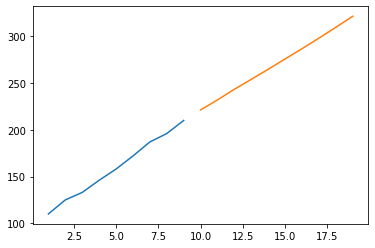

In [56]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)